In [36]:
# Definindo a grade de hiperparâmetros para otimização
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [37]:
# Inicializando o modelo Random Forest
random_forest = RandomForestClassifier(random_state=42)

# Configurando o GridSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Executando o GridSearchCV
grid_search.fit(X_treino, y_treino)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [38]:
# Melhor modelo e hiperparâmetros# Melhor modelo e hiperparâmetros
melhores_parametros = grid_search.best_params_
melhor_modelo = grid_search.best_estimator_
melhores_parametros

melhores_parametros = grid_search.best_params_
melhor_modelo = grid_search.best_estimator_
melhores_parametros

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

In [39]:
# Treinando o modelo com os melhores parâmetros encontrados
modelo_otimizado = RandomForestClassifier(
    n_estimators=200, 
    max_depth=None, 
    min_samples_split=5, 
    min_samples_leaf=2, 
    random_state=42
)

modelo_otimizado.fit(X_treino, y_treino)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [40]:
# Realizando previsões no conjunto de teste
y_pred_otimizado = modelo_otimizado.predict(X_teste)

In [41]:
acuracia_otimizada = accuracy_score(y_teste, y_pred_otimizado)
precisao_otimizada = precision_score(y_teste, y_pred_otimizado)
recall_otimizado = recall_score(y_teste, y_pred_otimizado)
f1_otimizado = f1_score(y_teste, y_pred_otimizado)
relatorio_otimizado = classification_report(y_teste, y_pred_otimizado, target_names=["Não", "Sim"])
matriz_confusao_otimizada = confusion_matrix(y_teste, y_pred_otimizado)

In [42]:
acuracia_otimizada

0.8436268068331143

In [43]:
precisao_otimizada

0.8477924089852827

In [44]:
recall_otimizado

0.8932870842685167

In [45]:
f1_otimizado

0.8699453551912568

In [49]:
print("\nRelatório de Classificação:")
print(relatorio_otimizado)

print("\nAcurácia:", acuracia)


Relatório de Classificação:
              precision    recall  f1-score   support

         Não       0.84      0.77      0.80      3470
         Sim       0.85      0.89      0.87      4901

    accuracy                           0.84      8371
   macro avg       0.84      0.83      0.84      8371
weighted avg       0.84      0.84      0.84      8371


Acurácia: 0.8444630271174293


In [47]:
matriz_confusao_otimizada

array([[2684,  786],
       [ 523, 4378]], dtype=int64)

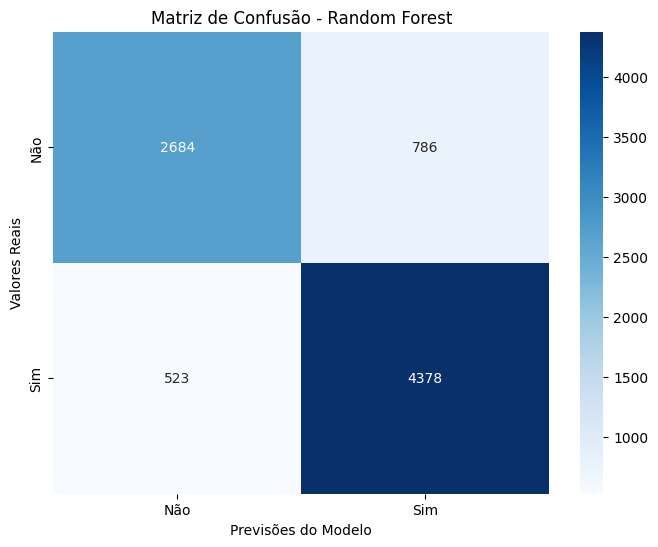

In [48]:
# Visualizando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_otimizada, annot=True, fmt="d", cmap="Blues", xticklabels=["Não", "Sim"], yticklabels=["Não", "Sim"])
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsões do Modelo")
plt.ylabel("Valores Reais")
plt.show()

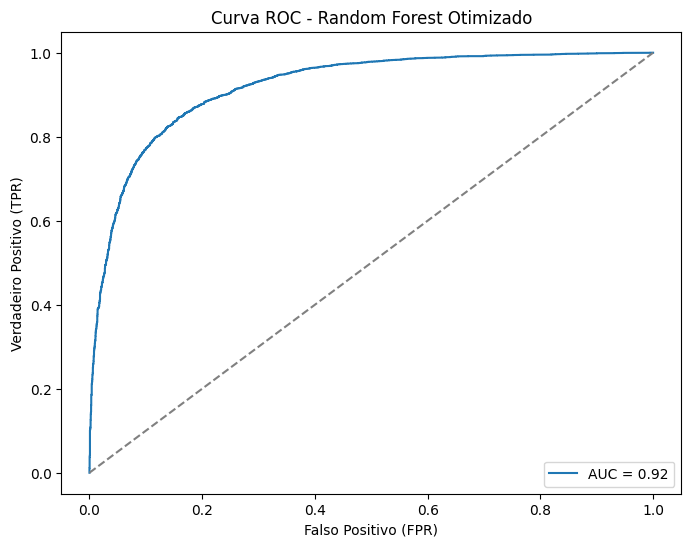

0.9199948019783059

In [53]:
# Calculando probabilidades para a curva ROC
y_probabilidades = modelo_otimizado.predict_proba(X_teste)[:, 1]

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_teste, y_probabilidades)
auc = roc_auc_score(y_teste, y_probabilidades)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Curva ROC - Random Forest Otimizado')
plt.xlabel('Falso Positivo (FPR)')
plt.ylabel('Verdadeiro Positivo (TPR)')
plt.legend(loc='lower right')
plt.show()

auc